## Exploratory Data Analysis for Data Engineers in America

In [ ]:
# Importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)  

## Filter for America Data Engineer roles

In [65]:
american_countries = [
    'United States', 'Canada', 'Mexico', 'Brazil', 'Argentina', 'Colombia',
    'Chile', 'Peru', 'Venezuela', 'Ecuador', 'Bolivia', 'Paraguay',
    'Uruguay', 'Guyana', 'Suriname', 'Panama', 'Costa Rica', 'Guatemala',
    'Honduras', 'Nicaragua', 'El Salvador', 'Belize', 'Cuba', 'Haiti',
    'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Bahamas'
]

df_america_DE = df[(df['job_title_short'] == 'Data Engineer') & (df['job_country'].isin(american_countries))]

## Locations to Explore:

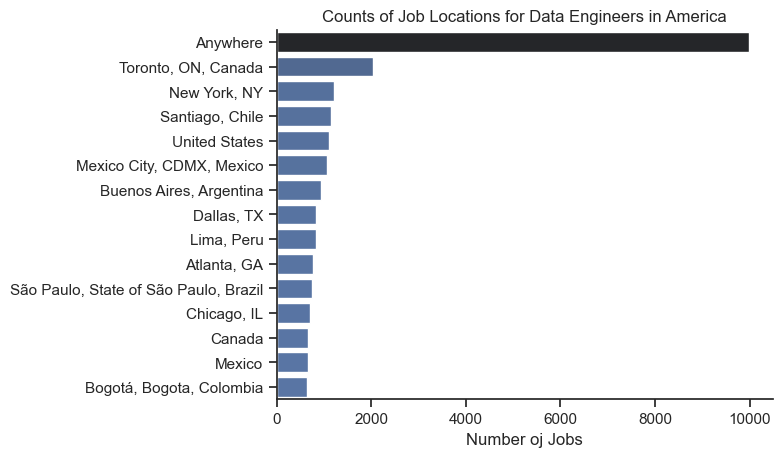

In [ ]:
df_plot = df_america_DE['job_location'].value_counts().head(15).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Engineers in America')
plt.xlabel('Number oj Jobs')
plt.ylabel('')
plt.show()

## Job Opportunities

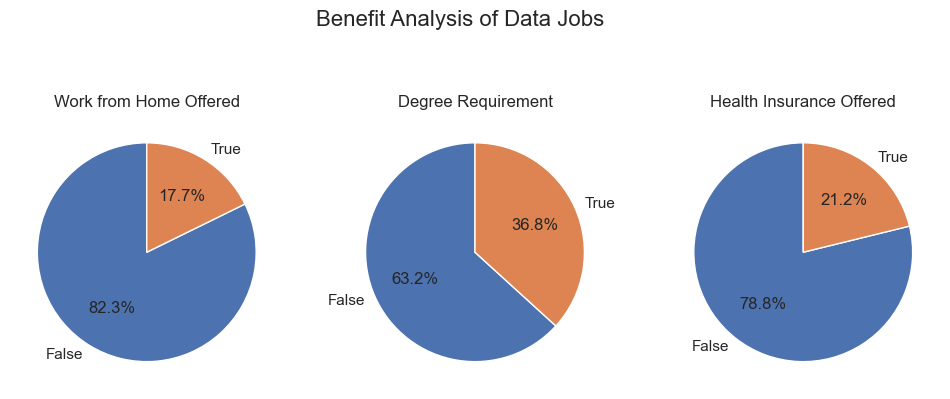

In [70]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_america_DE[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()


## Companies to Explore

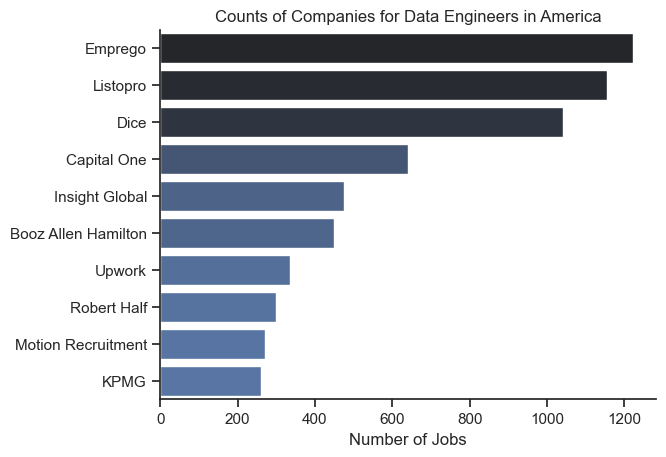

In [74]:
df_plot = df_america_DE['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Engineers in America')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()